Pareto Fronts

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/1158091576.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



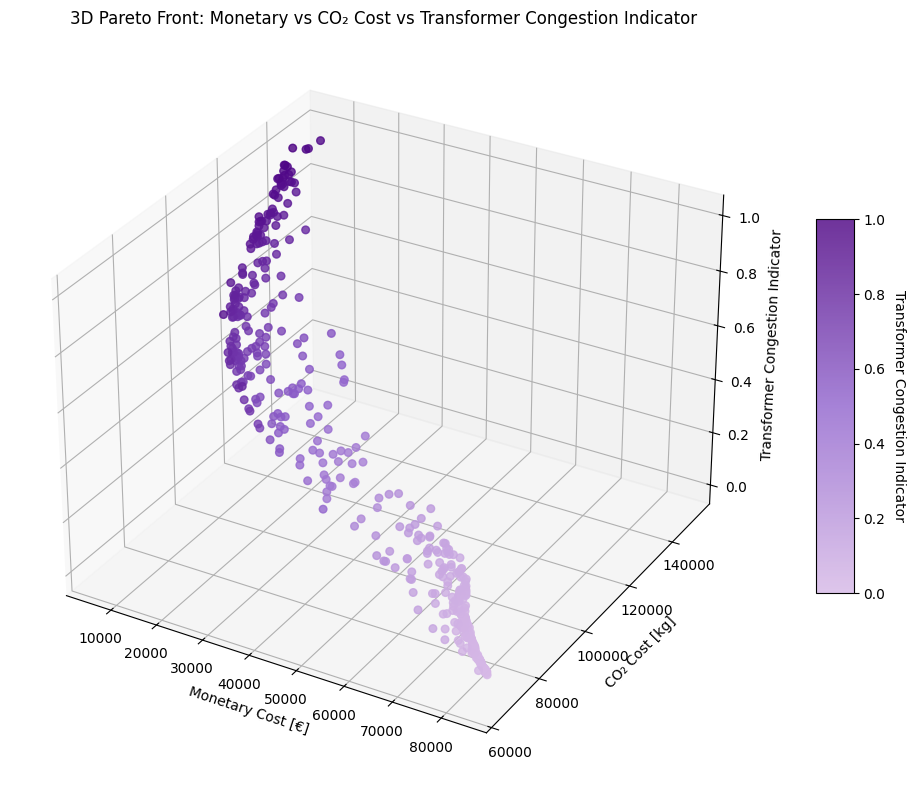

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path =  './pareto_front_runs_dirichlet/all_results.csv'  # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.92)  # Upper 8%
co2_cost_threshold = pareto_data["co2_cost"].quantile(0.98)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(0.98)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Define a custom colormap for Accenture's theme (using purples)
accenture_cmap = LinearSegmentedColormap.from_list(
    "accenture", ["#D6B8E6", "#9063CD", "#4B0082"]
)

# Create a 3D scatter plot for the filtered Pareto front
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
scatter = ax.scatter(
    filtered_data["monetary_cost"],
    filtered_data["co2_cost"],
    filtered_data["transformer_congestion_indicator"],
    c=filtered_data["transformer_congestion_indicator"],
    cmap=accenture_cmap,
    alpha=0.8,
    s=30  # Slightly larger points for better visibility
)

# Add color bar for transformer congestion indicator
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Transformer Congestion Indicator", rotation=270, labelpad=15)

# Set plot labels and title
ax.set_xlabel("Monetary Cost [€]")
ax.set_ylabel("CO₂ Cost [kg]")
ax.set_zlabel("Transformer Congestion Indicator")
ax.set_title("3D Pareto Front: Monetary vs CO₂ Cost vs Transformer Congestion Indicator")

# Improve layout
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import plotly.express as px

# ----------------------------
# 📊 Load the Dataset
# ----------------------------
file_path = './pareto_front_runs_dirichlet/all_results.csv' 
data = pd.read_csv(file_path)

# Extract relevant columns
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.92)
co2_cost_threshold = pareto_data["co2_cost"].quantile(0.98)
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(0.98)

filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Normalize Transformer Indicator
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# ----------------------------
# 📊 Create the Interactive Plot
# ----------------------------
fig = px.scatter_3d(
    filtered_data,
    x="monetary_cost",
    y="co2_cost",
    z="transformer_congestion_indicator",
    color="transformer_congestion_indicator",
    color_continuous_scale="purples",
    size_max=10,
    title="Interactive 3D Pareto Front: Monetary vs CO₂ Cost vs Transformer Congestion Indicator"
)

# Improve layout and labels
fig.update_layout(
    scene=dict(
        xaxis_title="Monetary Cost [€]",
        yaxis_title="CO₂ Cost [kg]",
        zaxis_title="Transformer Congestion Indicator"
    ),
    coloraxis_colorbar=dict(
        title="Transformer Congestion Indicator"
    )
)

# Show the interactive plot
fig.show()

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/2639010098.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



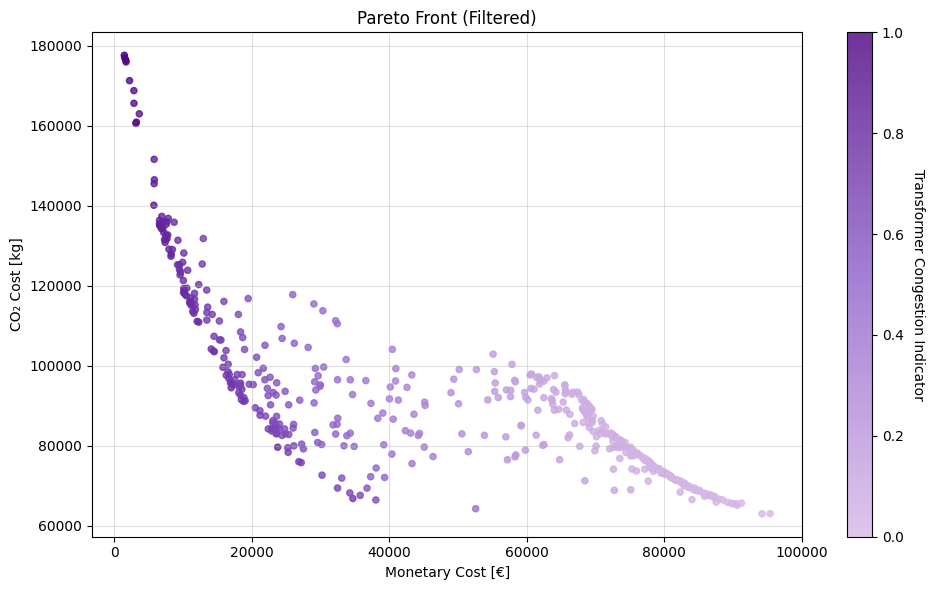

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
file_path = './pareto_front_runs_dirichlet/all_results.csv' # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(1)
co2_cost_threshold = pareto_data["co2_cost"].quantile(1)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(1)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Define a custom colormap for Accenture's theme (using purples)
accenture_cmap = LinearSegmentedColormap.from_list(
    "accenture", ["#D6B8E6", "#9063CD", "#4B0082"]
)

# Create a scatter plot for the filtered Pareto front
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    filtered_data["monetary_cost"],
    filtered_data["co2_cost"],
    c=filtered_data["transformer_congestion_indicator"],  # Color by transformer congestion
    cmap=accenture_cmap,
    alpha=0.8,
    s=20  # Set dot size smaller
)

# Add color bar for transformer congestion indicator
cbar = plt.colorbar(scatter)
cbar.set_label("Transformer Congestion Indicator", rotation=270, labelpad=15)

# Set plot labels and title
plt.xlabel("Monetary Cost [€]")
plt.ylabel("CO₂ Cost [kg]")
plt.title("Pareto Front (Filtered)")

# Improve layout
plt.grid(alpha=0.4)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/2481608207.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/2481608207.py:128: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

/Users/tomdebruin/miniforge3/envs/calliope/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



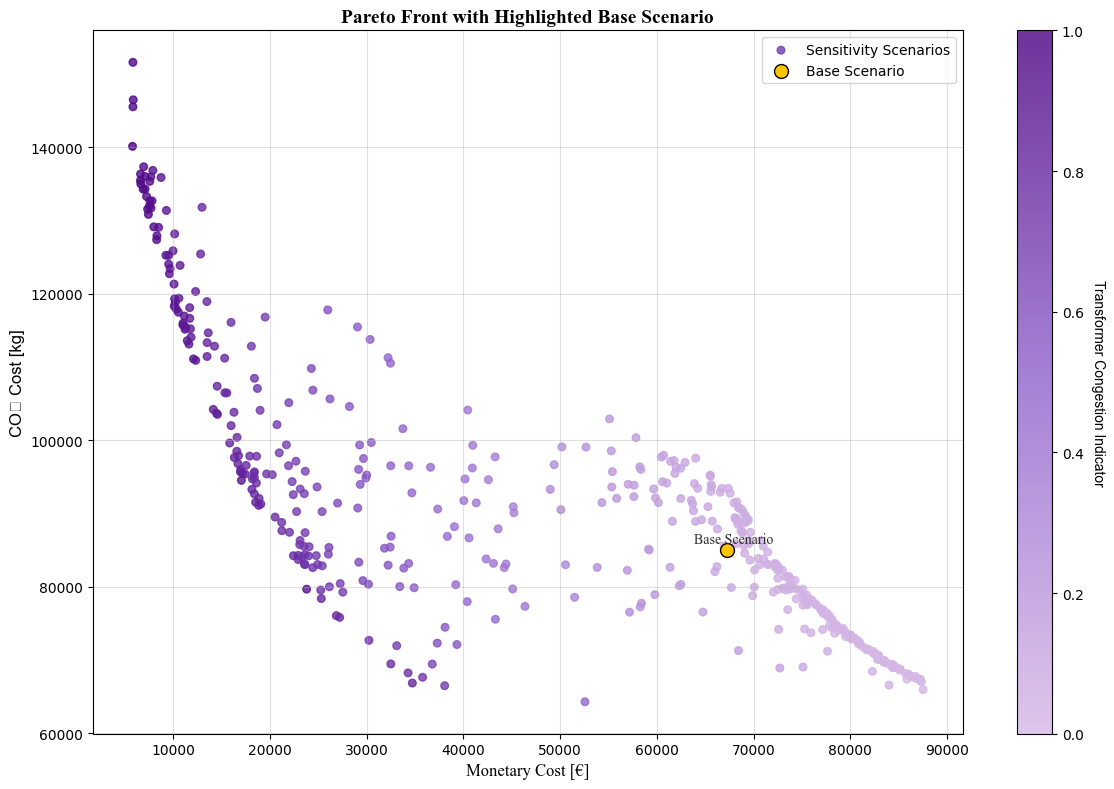

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr

# ----------------------------
# 📂 Paths and Directories
# ----------------------------
FILE_PATH = './pareto_front_runs_dirichlet/all_results.csv'  # Adjusted path
BASE_SCENARIO_PATH = '/Users/tomdebruin/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/00 THESIS/00 Working Docs/V4/model.nc'

# ----------------------------
# 📊 Load Dataset
# ----------------------------
# Load Pareto Front data
data = pd.read_csv(FILE_PATH)

# Extract relevant columns
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# ----------------------------
# 🛠️ Filter Extreme Values
# ----------------------------
# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.98)  # Top 2%
co2_cost_threshold = pareto_data["co2_cost"].quantile(0.98)
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(0.98)

# Filter dataset
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize transformer congestion indicator between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# ----------------------------
# 📊 Load Base Scenario Data
# ----------------------------
try:
    base_model = xr.open_dataset(BASE_SCENARIO_PATH)
    base_monetary_cost = base_model['cost'].sel(costs='monetary').sum().values.item()
    base_co2_cost = base_model['cost'].sel(costs='co2_emissions').sum().values.item()
    base_transformer_cost = base_model['cost'].sel(costs='transformer_congestion_indicator').sum().values.item()
    
    base_data = {
        "monetary_cost": base_monetary_cost,
        "co2_cost": base_co2_cost,
        "transformer_congestion_indicator": base_transformer_cost
    }
    
    # Standardize base_transformer_congestion_indicator
    base_data["transformer_congestion_indicator"] = (
        (base_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
        (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
    )
    
except KeyError as e:
    raise KeyError(f"[ERROR] Missing required variable in base scenario file: {e}")
except Exception as e:
    raise RuntimeError(f"[ERROR] Failed to process base scenario file: {e}")

# ----------------------------
# 🎨 Visualization Settings
# ----------------------------
accenture_cmap = LinearSegmentedColormap.from_list(
    "accenture", ["#D6B8E6", "#9063CD", "#4B0082"]
)

# ----------------------------
# 📊 Plot Pareto Front with Base Scenario Highlighted
# ----------------------------
plt.figure(figsize=(12, 8))

# Scatter plot for sensitivity scenarios
scatter = plt.scatter(
    filtered_data["monetary_cost"],
    filtered_data["co2_cost"],
    c=filtered_data["transformer_congestion_indicator"],  # Color by transformer congestion
    cmap=accenture_cmap,
    alpha=0.8,
    s=30,  # Smaller dot size for sensitivity scenarios
    label="Sensitivity Scenarios"
)

# Highlight Base Scenario
plt.scatter(
    base_data["monetary_cost"],
    base_data["co2_cost"],
    color="#FFC300",  # Accenture Gold
    edgecolor="black",
    alpha=1,
    s=100,  # Larger dot size for emphasis
    label="Base Scenario"
)

# Annotate the Base Scenario
plt.annotate(
    "Base Scenario",
    (base_data["monetary_cost"], base_data["co2_cost"]),
    textcoords="offset points",
    xytext=(5, 5),
    ha='center',
    fontsize=10,
    color='#2C2C2C',
    fontname='Times New Roman'
)

# Add color bar for transformer congestion indicator
cbar = plt.colorbar(scatter)
cbar.set_label("Transformer Congestion Indicator", rotation=270, labelpad=15, fontname='Arial')

# Plot labels and title
plt.xlabel("Monetary Cost [€]", fontname='Times New Roman', fontsize=12)
plt.ylabel("CO₂ Cost [kg]", fontname='Arial', fontsize=12)  # Fallback font for "₂"
plt.title("Pareto Front with Highlighted Base Scenario", fontname='Times New Roman', fontsize=14, fontweight='bold')

# Add grid and legend
plt.legend(loc='upper right', fontsize=10, frameon=True)
plt.grid(alpha=0.4)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/2012399109.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



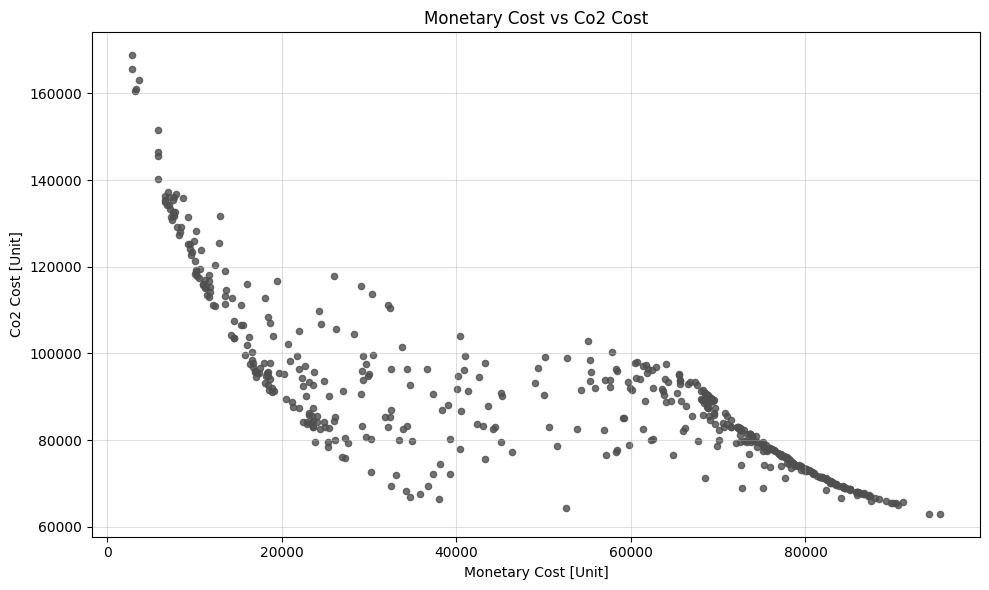

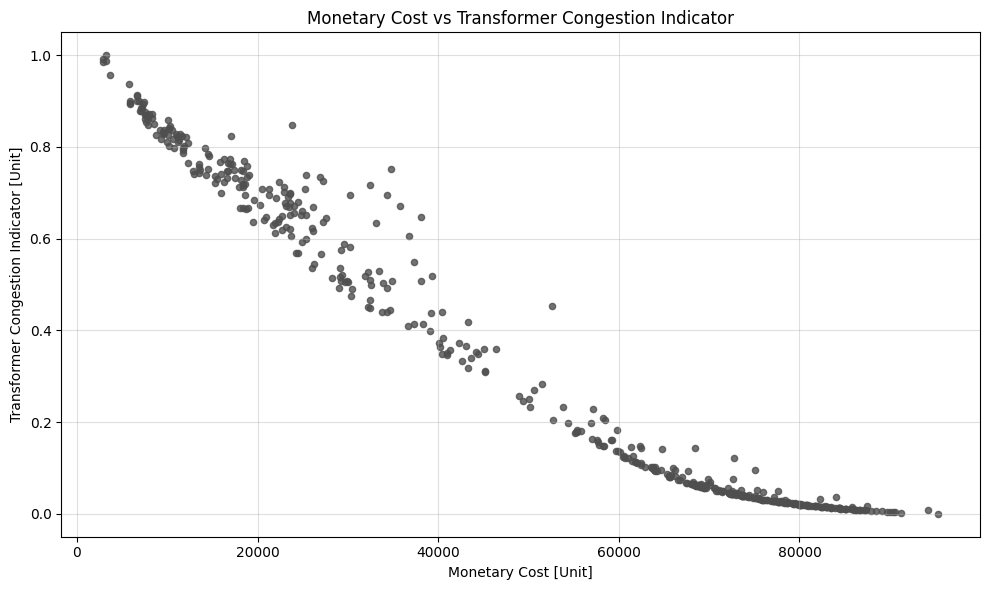

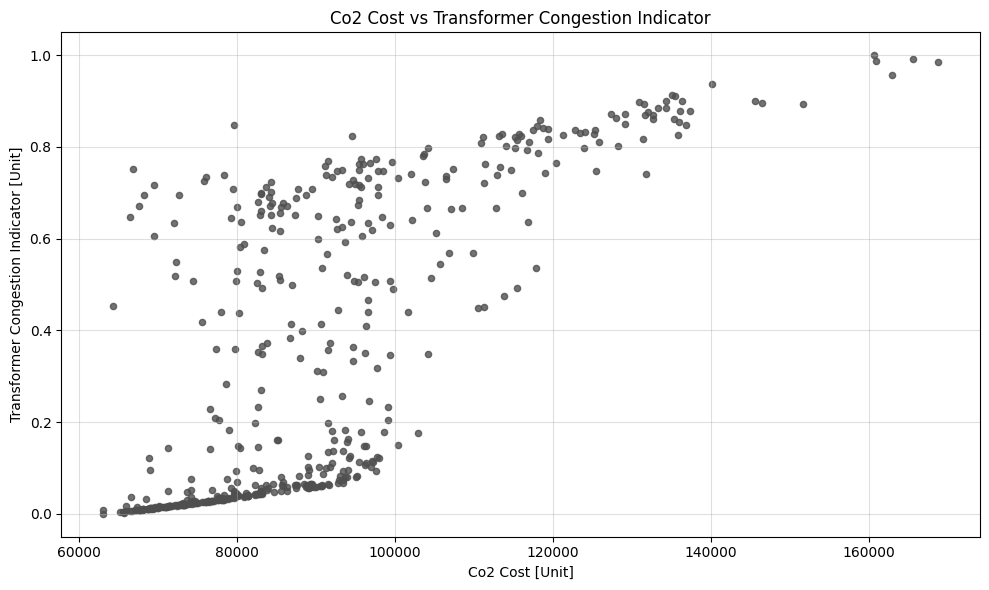

In [5]:
#Two dimensional plots
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './pareto_front_runs_dirichlet/all_results.csv' # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(1)  # Upper 8%
co2_cost_threshold = pareto_data["co2_cost"].quantile(0.99)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(0.99)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Function to create scatter plots for all combinations
def plot_combinations(data, variables, dot_color, save_plots=False):
    combinations = list(itertools.combinations(variables, 2))
    for x_var, y_var in combinations:
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            data[x_var],
            data[y_var],
            color=dot_color,  # Use blackish-grey color
            alpha=0.8,
            s=20  # Set dot size smaller
        )

        # Set labels and title
        plt.xlabel(f"{x_var.replace('_', ' ').title()} [Unit]")
        plt.ylabel(f"{y_var.replace('_', ' ').title()} [Unit]")
        plt.title(f"{x_var.replace('_', ' ').title()} vs {y_var.replace('_', ' ').title()}")

        # Improve layout
        plt.grid(alpha=0.4)
        plt.tight_layout()

        # Optionally save the plots
        if save_plots:
            filename = f"{x_var}_vs_{y_var}.png"
            plt.savefig(filename, dpi=300)
            print(f"Saved plot: {filename}")

        # Show the plot
        plt.show()

# Generate all 2D combination plots with blackish-grey dots
plot_combinations(
    filtered_data,
    ["monetary_cost", "co2_cost", "transformer_congestion_indicator"],  # Updated variable list
    dot_color="#4F4F4F",  # Blackish-grey color
    save_plots=False  # Set to True to save the plots as PNG files
)

Even

In [26]:
import pandas as pd
import plotly.express as px

# ----------------------------
# 📊 Load the Dataset
# ----------------------------
file_path = './pareto_front_runs5/all_results.csv' 
data = pd.read_csv(file_path)

# Extract relevant columns
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.92)
co2_cost_threshold = pareto_data["co2_cost"].quantile(1)
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(1)

filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Normalize Transformer Indicator
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# ----------------------------
# 📊 Create the Interactive Plot
# ----------------------------
fig = px.scatter_3d(
    filtered_data,
    x="monetary_cost",
    y="co2_cost",
    z="transformer_congestion_indicator",
    color="transformer_congestion_indicator",
    color_continuous_scale="purples",
    size_max=10,
    title="Interactive 3D Pareto Front: Monetary vs CO₂ Cost vs Transformer Congestion Indicator"
)

# Improve layout and labels
fig.update_layout(
    scene=dict(
        xaxis_title="Monetary Cost [€]",
        yaxis_title="CO₂ Cost [kg]",
        zaxis_title="Transformer Congestion Indicator"
    ),
    coloraxis_colorbar=dict(
        title="Transformer Congestion Indicator"
    )
)

# Show the interactive plot
fig.show()

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/3594894533.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/3788282773.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



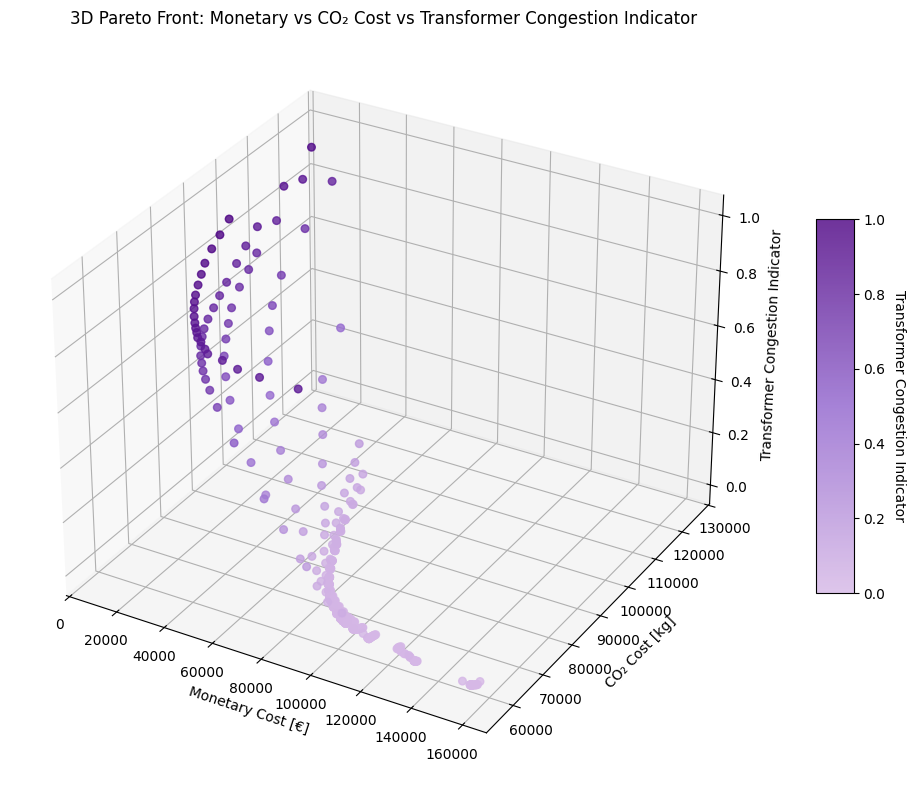

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path =  './pareto_front_runs5/all_results.csv'  # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.92)  # Upper 8%
co2_cost_threshold = pareto_data["co2_cost"].quantile(0.98)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(0.98)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Define a custom colormap for Accenture's theme (using purples)
accenture_cmap = LinearSegmentedColormap.from_list(
    "accenture", ["#D6B8E6", "#9063CD", "#4B0082"]
)

# Create a 3D scatter plot for the filtered Pareto front
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
scatter = ax.scatter(
    filtered_data["monetary_cost"],
    filtered_data["co2_cost"],
    filtered_data["transformer_congestion_indicator"],
    c=filtered_data["transformer_congestion_indicator"],
    cmap=accenture_cmap,
    alpha=0.8,
    s=30  # Slightly larger points for better visibility
)

# Add color bar for transformer congestion indicator
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Transformer Congestion Indicator", rotation=270, labelpad=15)

# Set plot labels and title
ax.set_xlabel("Monetary Cost [€]")
ax.set_ylabel("CO₂ Cost [kg]")
ax.set_zlabel("Transformer Congestion Indicator")
ax.set_title("3D Pareto Front: Monetary vs CO₂ Cost vs Transformer Congestion Indicator")

# Improve layout
plt.tight_layout()
plt.show()


/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/442962860.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



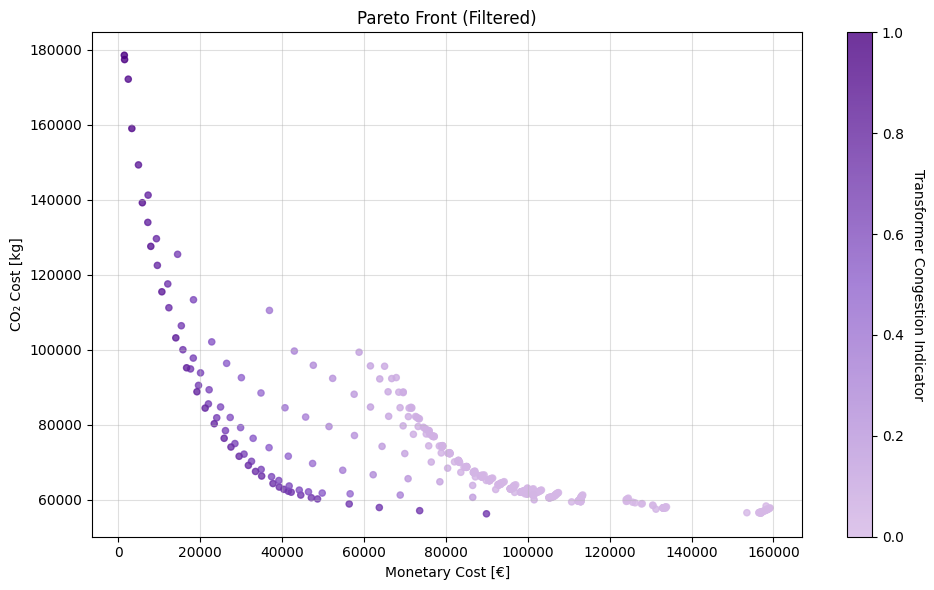

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the dataset
file_path = './pareto_front_runs5/all_results.csv' # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.93)
co2_cost_threshold = pareto_data["co2_cost"].quantile(1)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(1)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Define a custom colormap for Accenture's theme (using purples)
accenture_cmap = LinearSegmentedColormap.from_list(
    "accenture", ["#D6B8E6", "#9063CD", "#4B0082"]
)

# Create a scatter plot for the filtered Pareto front
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    filtered_data["monetary_cost"],
    filtered_data["co2_cost"],
    c=filtered_data["transformer_congestion_indicator"],  # Color by transformer congestion
    cmap=accenture_cmap,
    alpha=0.8,
    s=20  # Set dot size smaller
)

# Add color bar for transformer congestion indicator
cbar = plt.colorbar(scatter)
cbar.set_label("Transformer Congestion Indicator", rotation=270, labelpad=15)

# Set plot labels and title
plt.xlabel("Monetary Cost [€]")
plt.ylabel("CO₂ Cost [kg]")
plt.title("Pareto Front (Filtered)")

# Improve layout
plt.grid(alpha=0.4)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/hw/y4klzjqd4r9b2k9kpqcs_qth0000gn/T/ipykernel_1882/877276279.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



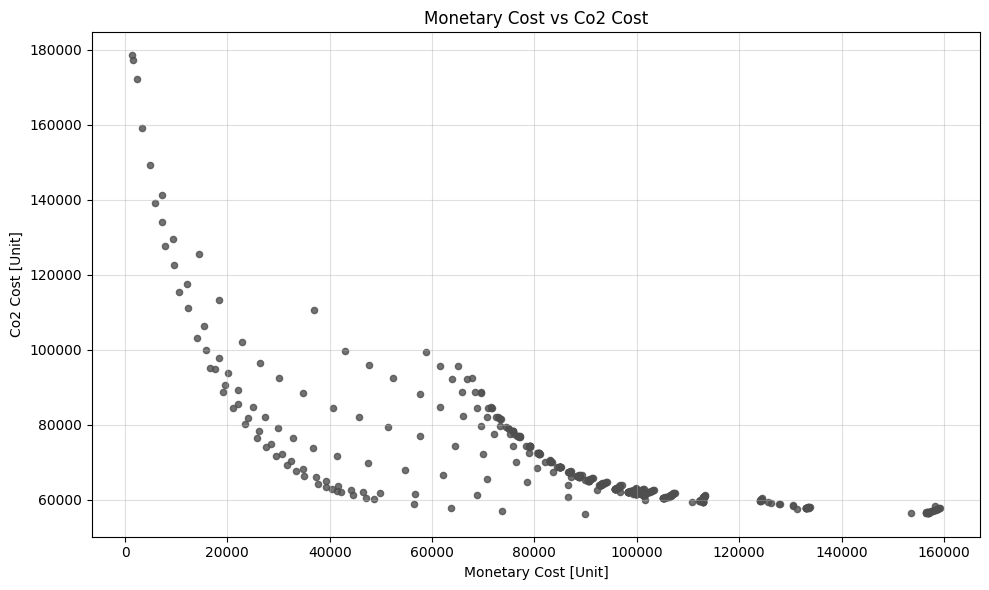

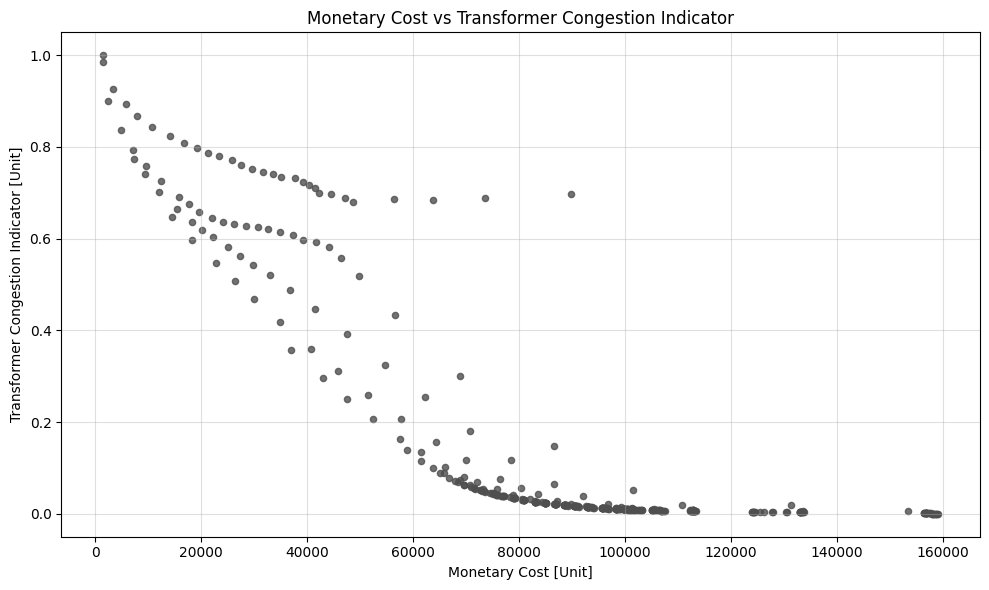

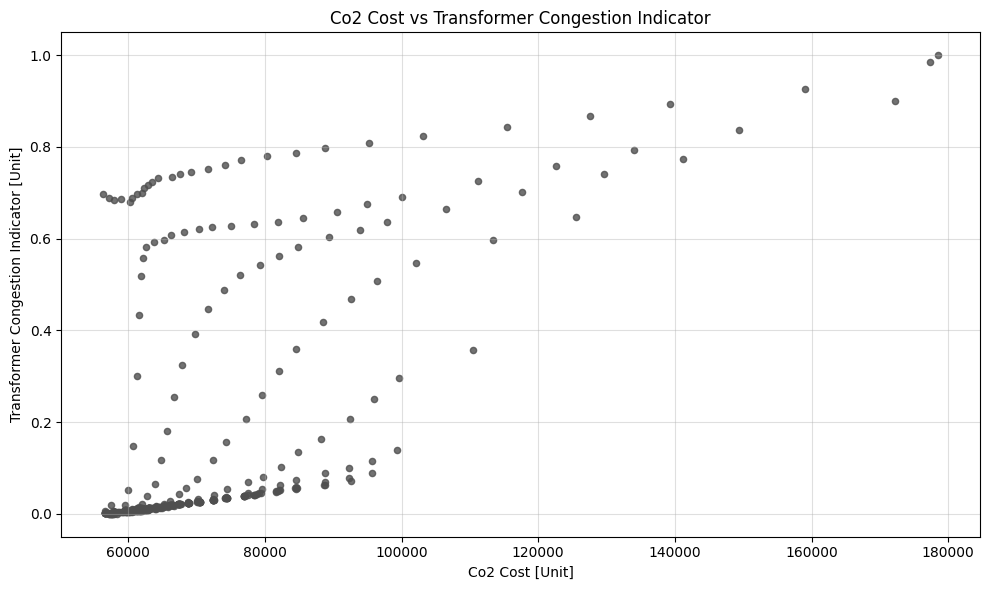

In [14]:
#Two dimensional plots
import itertools
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './pareto_front_runs5/all_results.csv' # Adjusted to match output directory
data = pd.read_csv(file_path)

# Extract relevant columns for plotting
pareto_data = data[["monetary_cost", "co2_cost", "transformer_congestion_indicator"]]

# Define thresholds to filter extreme values
monetary_cost_threshold = pareto_data["monetary_cost"].quantile(0.93)  # Upper 8%
co2_cost_threshold = pareto_data["co2_cost"].quantile(1)            # Upper 2%
transformer_cost_threshold = pareto_data["transformer_congestion_indicator"].quantile(1)  # Upper 2%

# Filter the dataset to exclude extreme values
filtered_data = pareto_data[
    (pareto_data["monetary_cost"] <= monetary_cost_threshold) &
    (pareto_data["co2_cost"] <= co2_cost_threshold) &
    (pareto_data["transformer_congestion_indicator"] <= transformer_cost_threshold)
]

# Standardize the transformer_congestion_indicator column between 0 and 1
filtered_data["transformer_congestion_indicator"] = (
    (filtered_data["transformer_congestion_indicator"] - filtered_data["transformer_congestion_indicator"].min()) /
    (filtered_data["transformer_congestion_indicator"].max() - filtered_data["transformer_congestion_indicator"].min())
)

# Function to create scatter plots for all combinations
def plot_combinations(data, variables, dot_color, save_plots=False):
    combinations = list(itertools.combinations(variables, 2))
    for x_var, y_var in combinations:
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            data[x_var],
            data[y_var],
            color=dot_color,  # Use blackish-grey color
            alpha=0.8,
            s=20  # Set dot size smaller
        )

        # Set labels and title
        plt.xlabel(f"{x_var.replace('_', ' ').title()} [Unit]")
        plt.ylabel(f"{y_var.replace('_', ' ').title()} [Unit]")
        plt.title(f"{x_var.replace('_', ' ').title()} vs {y_var.replace('_', ' ').title()}")

        # Improve layout
        plt.grid(alpha=0.4)
        plt.tight_layout()

        # Optionally save the plots
        if save_plots:
            filename = f"{x_var}_vs_{y_var}.png"
            plt.savefig(filename, dpi=300)
            print(f"Saved plot: {filename}")

        # Show the plot
        plt.show()

# Generate all 2D combination plots with blackish-grey dots
plot_combinations(
    filtered_data,
    ["monetary_cost", "co2_cost", "transformer_congestion_indicator"],  # Updated variable list
    dot_color="#4F4F4F",  # Blackish-grey color
    save_plots=False  # Set to True to save the plots as PNG files
)